# Chapter 3 

Simulate a simple model with 

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 100

import itertools
import string
import random
from types import SimpleNamespace, FunctionType
from random import gauss

from modelling import *

In [5]:
# Define SIM model
sim = Varspace()

# Add parameter vars
sim.theta = 0.2 # Tax rate
sim.alpha1 = 0.6 # MPC of income
sim.alpha2 = 0.4 # MPC of wealth

# Add exogenous vars
sim.G = TimeVar("Government exp.")
sim.W = TimeVar("Wages")

# Define equations
sim.addEq('C', lambda t: alpha1 * YD(t) + alpha2 * Hh(t-1))
sim.addEq('Y', lambda t: C(t) + G(t))
sim.addEq('N', lambda t: Y(t) / W(t))
sim.addEq('tax', lambda t: theta * W(t) * N(t))
sim.addEq('YD', lambda t: W(t) * N(t) - tax(t))
sim.addEq('Hs', lambda t: Hs(t-1) + G(t) - tax(t))
sim.addEq('S', lambda t: YD(t) - C(t))
sim.addEq('Hh', lambda t: Hh(t-1) + S(t))

# Reset vars with values
sim.setTime(100)
sim.G.setTime(100, val = 20)
sim.G.val[0:2] = 0
sim.W.setTime(100, val = 1)

# Simulate
sim.run(t = range(1, 100), rep=20)

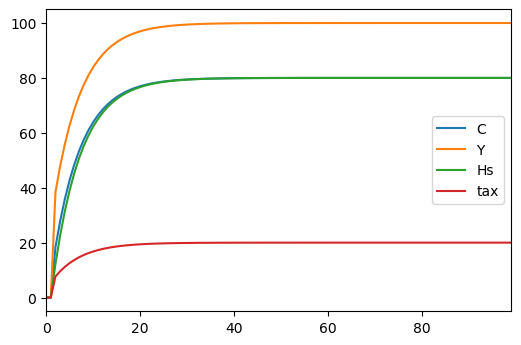

In [6]:
# Plot
res = pd.DataFrame.from_dict(sim.getRes())
res[['C','Y', 'Hs', 'tax']].plot()